# **PREDICTING CRUDE OIL PRICE WITH LINEAR REGRESSION ALGORITHM **

INTRODUCTION

The objective of the study is to analyse the data on Crude oil prices from https://www.kaggle.com/code/sc231997/crude-oil-price-extractor and to conduct data analysis in order to get meaningful information from it.The 'Linear Regression' statiscal algorithm would be used to train the dataset and predict prices using moving averages of 3 and 9.From the data analysis,there will be a discovery of valuable insight that will be of importance to investors.

RESEARCH QUESTIONS

The aim of this study is to answer the questions

a)Does previous prices serve as key determinate of future crude oil prices?

b)what is the relationship between 3 years moving price average on current prices?

c)what is the relationship between 9 years moving price average on current prices?


DATA COLLECTION AND METHODOLOGY

The data used in this analysis is a secondary data from Kaggle.It uses Crude oil price in USD/Bbl from 1983 to present.

# **STARTING ANALYSIS WITH PYTHON**

In [29]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression


In [30]:
# reading the data into a dataframe
df = pd.read_csv('/content/crude-oil-price.csv')
df.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62


In [31]:
#changing dates into pandas format
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,price,percentChange,change
0,1983-03-30,29.27,NaN,NaN
1,1983-04-04,30.63,4.646396,1.36
2,1983-05-02,30.25,-1.240614,-0.38
3,1983-06-01,31.38,3.735537,1.13
4,1983-07-01,32.00,1.975781,0.62


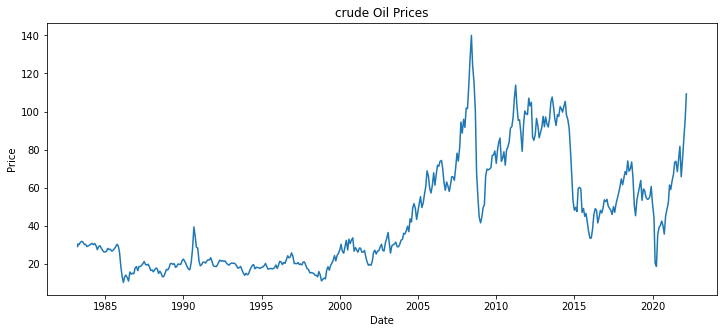

In [32]:
# plotting a line graph for the using the date and price
plt.figure(figsize=(12,5))
plt.plot(df['date'],df["price"])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("crude Oil Prices") 
plt.show()

In [33]:
#DATA PREPROCESSING
df.drop(['percentChange','change' ], axis=1)


,date,price
0,1983-03-30,29.27
1,1983-04-04,30.63
2,1983-05-02,30.25
3,1983-06-01,31.38
4,1983-07-01,32.00
...,...,...
464,2021-11-01,65.85
465,2021-12-01,74.88
466,2022-01-03,86.49
467,2022-02-01,95.72


In [34]:
#Uning Pandas in creating moving averages (rolling window)
# moving average for 3 and 9 days
df['MovingAverage3'] = df['price'].rolling(window=3).mean()
df['MovingAverage9'] = df['price'].rolling(window=9).mean()
df.head()

,date,price,percentChange,change,MovingAverage3,MovingAverage9
0,1983-03-30,29.27,NaN,NaN,NaN,NaN
1,1983-04-04,30.63,4.646396,1.36,NaN,NaN
2,1983-05-02,30.25,-1.240614,-0.38,30.050000,NaN
3,1983-06-01,31.38,3.735537,1.13,30.753333,NaN
4,1983-07-01,32.00,1.975781,0.62,31.210000,NaN


In [35]:
# preprocessing data to exclude missing values
df = df.dropna(inplace=False)
df.head()

,date,price,percentChange,change,MovingAverage3,MovingAverage9
8,1983-11-01,29.23,-3.753704,-1.14,29.986667,30.564444
9,1983-12-01,29.60,1.265823,0.37,29.733333,30.601111
10,1984-01-03,29.98,1.283784,0.38,29.603333,30.528889
11,1984-02-01,30.55,1.901268,0.57,30.043333,30.562222
12,1984-03-01,30.85,0.981997,0.30,30.460000,30.503333


In [36]:
# 1c. 	Define the Train and Test Data: 
# 1. Define X and y
X = df[['MovingAverage3', 'MovingAverage9']]
y = df['price']

# 2. Train-Test Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size = 0.3)

#linear regression model

In [37]:
#import libraries 
from sklearn.linear_model import LinearRegression 
slr_model = LinearRegression()

#Fit the Model on Train Set
slr_model.fit(X_train, y_train)

#Defining slope and y_intercept
slope = slr_model.coef_
y_intercept = slr_model.intercept_


print("slope:",slope)
print("y_intercept:",y_intercept)

slope: [ 1.27685649 -0.28493435]
y_intercept: 0.36844154480718316


In [38]:
#Prediction Function and Result
#Make Predictions on Train Set
y_pred_train = slr_model.predict(X_train)

 #Evaluate the Fit on Train Set
from sklearn.metrics import r2_score, mean_squared_error
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print ("r2_train:" ,r2_train)
print ("mse_train:",mse_train)

r2_train: 0.9828555307986311
mse_train: 14.569728439109904


In [39]:
# Make Predictions on Test Set
y_pred_test = slr_model.predict(X_test)

In [40]:
#adding visuals 
# create data frame for predictions made and actual values

PredictedVrsActual = slr_model.predict(X_test)
PredictedVrsActual = pd.DataFrame(data={'date':df['date'],'predictions': y_pred_test, 'actual': y_test},index=y_test.index)
PredictedVrsActual.head()

,date,predictions,actual
336,2011-03-01,101.490991,106.72
431,2019-02-01,49.240866,57.22
286,2007-01-02,59.166665,58.14
86,1990-05-01,18.527761,17.40
328,2010-07-01,75.239871,78.95


In [41]:
PredictedVrsActual= PredictedVrsActual.set_index('date')


In [42]:
PredictedVrsActual.head()

,predictions,actual
date,,
2011-03-01,101.490991,106.72
2019-02-01,49.240866,57.22
2007-01-02,59.166665,58.14
1990-05-01,18.527761,17.40
2010-07-01,75.239871,78.95


In [43]:
PredictedVrsActual.sort_values(by='date', inplace=True)
print(PredictedVrsActual)

            predictions  actual
date                           
1983-12-01    29.614334   29.60
1984-02-01    30.021240   30.55
1984-04-02    30.744304   30.26
1984-05-01    30.887538   30.83
1984-06-01    30.438669   29.75
...                 ...     ...
2020-11-02    41.939792   45.34
2021-09-01    74.116227   75.03
2021-10-01    76.512338   81.78
2021-11-01    75.246730   65.85
2021-12-01    74.685202   74.88

[139 rows x 2 columns]


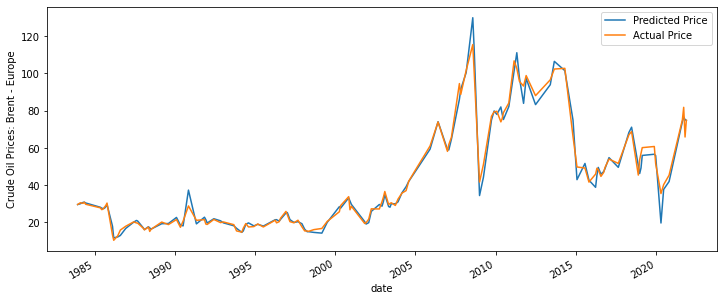

In [44]:
PredictedVrsActual.plot(figsize=(12,5))
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - Europe")
plt.show()

**ANALYSIS**

From the algorithm

The linear regression model is
PRICE = 0.368 + 1.28(MA3) - 0.28 (MA9) 


This implies that there is a constant increase of 0.368 in price when other factors do not change.

Also,when all remains same, when there is a unit change in MA3 price will increase by 1.28.

For MA9,a unit change in it,decreases price by 0.28 with everything remaining the same.

The R2 is 0.98 which means that MA3 and MA9 explains 98% of current prices.

